# Research Question: How do DA opportunities compare with other roles, and how transferable are DA skills?
1. How do salaries differ across DA and other data-related roles?
2. What skill additions allow a DA to “upgrade” into other data-related roles?
3. How do the application opportunities for Data Analyst compare with other data-related roles in Vietnam?

Load the dataset

In [70]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [71]:
df_vn = df[df['job_country'] == 'Vietnam'].copy()

## How do salaries differ across DA and other data-related roles?
Methodlogy
1. Filter dataset for postings in Vietnam and exclude missing salary values.
2. Select the top 6 most frequent job titles (job_title_short) within data-related roles.
3. Calculate the median salary for each role to establish a ranking order.
4. Visualize salary distributions using a boxplot

Filter dataset for postings in Vietnam and exclude missing salary values.

In [72]:
df_salary_vn = df[(df['job_country'] == 'Vietnam')].dropna(subset=['salary_year_avg'])

Select the top 6 most frequent job titles (job_title_short) within data-related roles.

In [73]:
job_titles = df_salary_vn['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Machine Learning Engineer',
 'Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

Calculate the median salary for each role to establish a ranking order.

In [95]:
df_salary_vn_top6 = df_salary_vn[df_salary_vn['job_title_short'].isin(job_titles)]
job_order = df_salary_vn_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

Visualize salary distributions using a boxplot

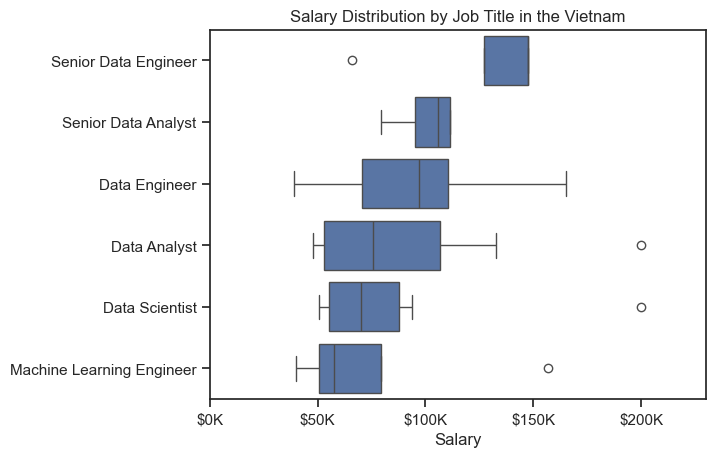

In [75]:
sns.set_theme(style="ticks")

sns.boxplot(data=df_salary_vn_top6, x='salary_year_avg', y='job_title_short', order=job_order)
plt.title('Salary Distribution by Job Title in the Vietnam')
plt.xlabel('Salary')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.xlim(0, 230000)
plt.show()

## What skill additions allow a DA to “upgrade” into other data-related roles?
Methodology
1. Filter job postings for roles other than Data Analyst and parse the skills into lists.
2. Identify the top 10 most common skills for each target role and Data Analyst.
3. Compare skills to find transferable skills from DA and additional skills to learn for each role, then summarize in a roadmap table.

Filter job postings for roles other than Data Analyst and parse the skills into lists.

In [79]:
df_vn_roles = df_vn[df_vn['job_title_short'].isin(job_titles)].copy()
df_other_roles = df_vn_roles[df_vn_roles['job_title_short'] != "Data Analyst"].copy()

def parse_skills(skills):
    if isinstance(skills, str):
        try:
            return ast.literal_eval(skills)
        except:
            return skills.split(',')  # fallback
    elif isinstance(skills, list):
        return skills
    return []

df_other_roles['job_skills_parsed'] = df_other_roles['job_skills'].apply(parse_skills)
df_other_roles.head(1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_skills_parsed
1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"[sql, nosql, python, r, scala, java, rust, kotlin, hadoop, spark, kafka, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['hadoop', 'spark', 'kafka'], 'programming': ['sql', 'nosql', 'python', 'r', 'scala', 'java', 'rust', 'kotlin']}","[sql, nosql, python, r, scala, java, rust, kotlin, hadoop, spark, kafka, tableau]"


Identify the top 10 most common skills for each target role and Data Analyst.

In [80]:
role_skill_map = {}
for role, skills in df_other_roles.groupby('job_title_short')['job_skills_parsed']:
    all_skills = sum(skills.tolist(), [])
    top_skills = pd.Series(all_skills).value_counts().head(10).index.tolist()
    role_skill_map[role] = top_skills

df_da_skills = df_vn_roles[df_vn_roles['job_title_short']=="Data Analyst"]['job_skills'].apply(parse_skills)
da_all_skills = sum(df_da_skills.tolist(), [])
da_top_skills = pd.Series(da_all_skills).value_counts().head(10).index.tolist()

Compare skills to find transferable skills from DA and additional skills to learn for each role, then summarize in a roadmap table.

In [81]:
rows = []
for role, skills in role_skill_map.items():
    transferable = list(set(da_top_skills) & set(skills))
    to_learn = list(set(skills) - set(transferable))
    rows.append({
        'Target Role': role,
        'Transferable Skills (from DA)': transferable,
        'Skills to Learn': to_learn
    })

df_skill_upgrade = pd.DataFrame(rows)

title = "What skill additions allow a DA to “upgrade” into other data-related roles?"
print(title)
df_skill_upgrade

What skill additions allow a DA to “upgrade” into other data-related roles?


,Target Role,Transferable Skills (from DA),Skills to Learn
0,Data Engineer,"[python, sql, aws]","[nosql, airflow, spark, mongodb, kafka, java, hadoop]"
1,Data Scientist,"[aws, python, tableau, sql, r]","[spark, pytorch, tensorflow, java, hadoop]"
2,Machine Learning Engineer,"[python, sql, aws]","[keras, spark, pandas, pytorch, tensorflow, java, scikit-learn]"
3,Senior Data Analyst,"[python, excel, sas, tableau, sql, power bi, r]","[bigquery, pyspark, spark]"
4,Senior Data Engineer,"[python, sql, aws]","[nosql, airflow, spark, mongodb, kafka, java, hadoop]"


## How do the application opportunities for Data Analyst compare with other data-related roles in Vietnam?
Methodology
1. Analyze differences in required qualifications and remote options (job_no_degree_mention, job_work_from_home).
2. Visualize with stacked bar charts showing posting volume vs accessibility factors for each role.

Analyze differences in required qualifications and remote options (job_no_degree_mention, job_work_from_home).

In [86]:
df_access = (
    df_vn_roles.groupby(['job_title_short', 'job_no_degree_mention', 'job_work_from_home'])
    .size()
    .reset_index(name='no_job_posted')
)

df_access['accessibility'] = df_access.apply(
    lambda x: f"{'No degree' if x['job_no_degree_mention'] else 'Degree'} | "
              f"{'Remote' if x['job_work_from_home'] else 'On-site'}",
    axis=1
)

df_pivot = df_access.pivot(index='job_title_short', columns='accessibility', values='no_job_posted').fillna(0)
df_pivot

accessibility,Degree | On-site,Degree | Remote,No degree | On-site,No degree | Remote
job_title_short,,,,
Data Analyst,164.0,9.0,151.0,10.0
Data Engineer,408.0,37.0,309.0,14.0
Data Scientist,325.0,16.0,31.0,3.0
Machine Learning Engineer,102.0,9.0,4.0,0.0
Senior Data Analyst,29.0,3.0,38.0,1.0
Senior Data Engineer,111.0,19.0,86.0,4.0


<Figure size 1000x600 with 0 Axes>

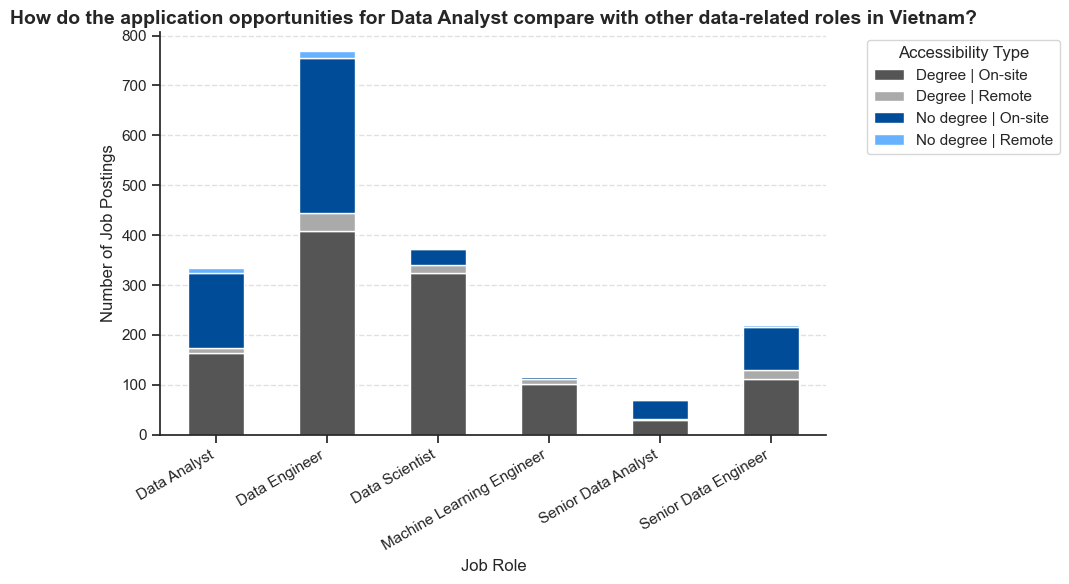

In [92]:
custom_palette = {
    'Degree | On-site': '#555555',    
    'Degree | Remote': '#AAAAAA',     
    'No degree | On-site': '#004c99', 
    'No degree | Remote': '#66b2ff'   
}

plt.figure(figsize=(10,6))
sns.set_style("ticks")
df_pivot.plot(kind='bar', stacked=True, color=[custom_palette[col] for col in df_pivot.columns], figsize=(10,6))

sns.despine()
plt.title("How do the application opportunities for Data Analyst compare with other data-related roles in Vietnam?", fontsize=14, fontweight='bold')
plt.xlabel("Job Role")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Accessibility Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

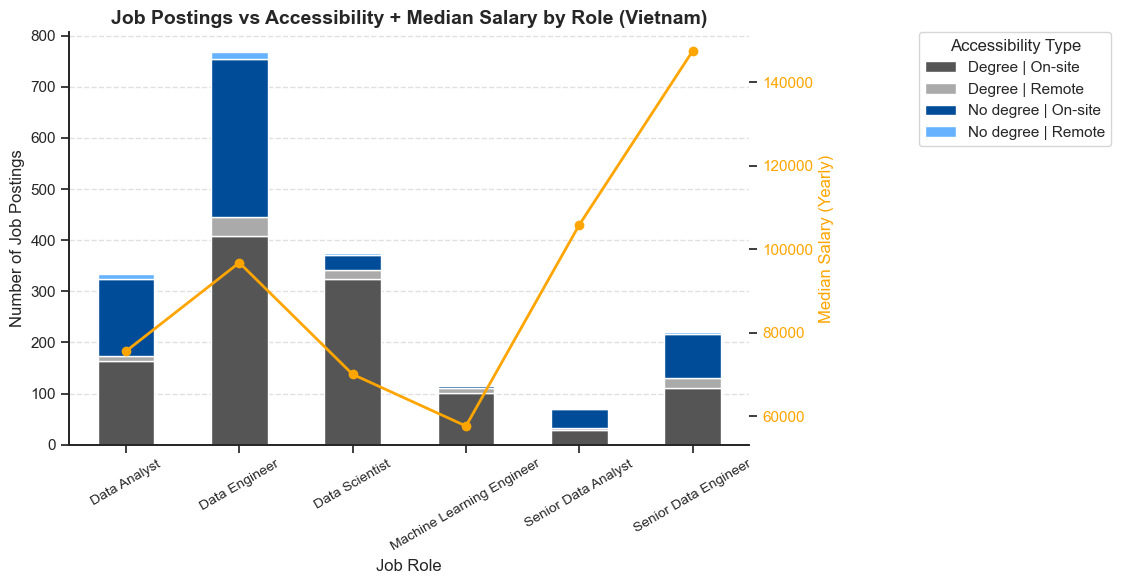

In [110]:
# Median salary
df_salary_median = df_vn_roles.groupby('job_title_short')['salary_year_avg'].median()

# Vẽ stacked bar chart
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(12,6))

# Bar chart
df_pivot.plot(
    kind='bar',
    stacked=True,
    color=[custom_palette[col] for col in df_pivot.columns],
    ax=ax
)

# Line chart median salary
ax2 = ax.twinx()
ax2.plot(
    df_pivot.index, 
    df_salary_median.reindex(df_pivot.index),  # đảm bảo index khớp
    color='orange', marker='o', linewidth=2
)

# Legends
ax.legend(title="Accessibility Type", bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0)

# Trang trí
sns.despine()
ax.set_title("Job Postings vs Accessibility + Median Salary by Role (Vietnam)", fontsize=14, fontweight='bold')
ax.set_xlabel("Job Role")
ax.set_ylabel("Number of Job Postings")
ax2.set_ylabel("Median Salary (Yearly)", color='orange')
ax.tick_params(axis='x', rotation=30, labelsize=10)
ax2.tick_params(axis='y', labelcolor='orange')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()